In [105]:
import cv2
from PIL import Image
from tqdm import tqdm
from glob import glob
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.training import saver
import matplotlib.pyplot as plt
# % matplotlib inline

In [91]:
width = 360
height = 600
train_path = "./resource/Train/"
# train_path = "./resource/Train2/"
nub_train = len(glob(train_path + '/*/*.jpg'))
#先生成空array，然后往里填每张图片的array
x_train = np.zeros((nub_train, 600, 360, 3), dtype=np.uint8)
y_train = np.zeros((nub_train,), dtype=np.uint8)

In [92]:
i = 0

for img_path in tqdm(glob(train_path + '/*/*.jpg')):
    img = Image.open(img_path)
    img = img.resize((360, 600))  #图片resize
    arr = np.asarray(img)  #图片转array
    x_train[i, :, :, :] = arr  #赋值
    typeName = img_path.split('/')[-2]
    if typeName == 'amborella':
        y_train[i] = 0
    elif typeName == ' castanea':
        y_train[i] = 1
    elif typeName == ' convolvulaceae':
        y_train[i] = 2
    elif typeName == ' desmodium':
        y_train[i] = 3
    elif typeName == ' eugenia':
        y_train[i] = 4
    elif typeName == ' laurus':
        y_train[i] = 5
    elif typeName == ' litsea':
        y_train[i] = 6
    elif typeName == ' magnolia':
        y_train[i] = 7
    elif typeName == ' monimiaceae':
        y_train[i] = 8
    elif typeName == ' rubus':
        y_train[i] = 9
    elif typeName == ' ulmus':
        y_train[i] = 10

    i += 1

100%|██████████| 193/193 [01:00<00:00,  3.18it/s]


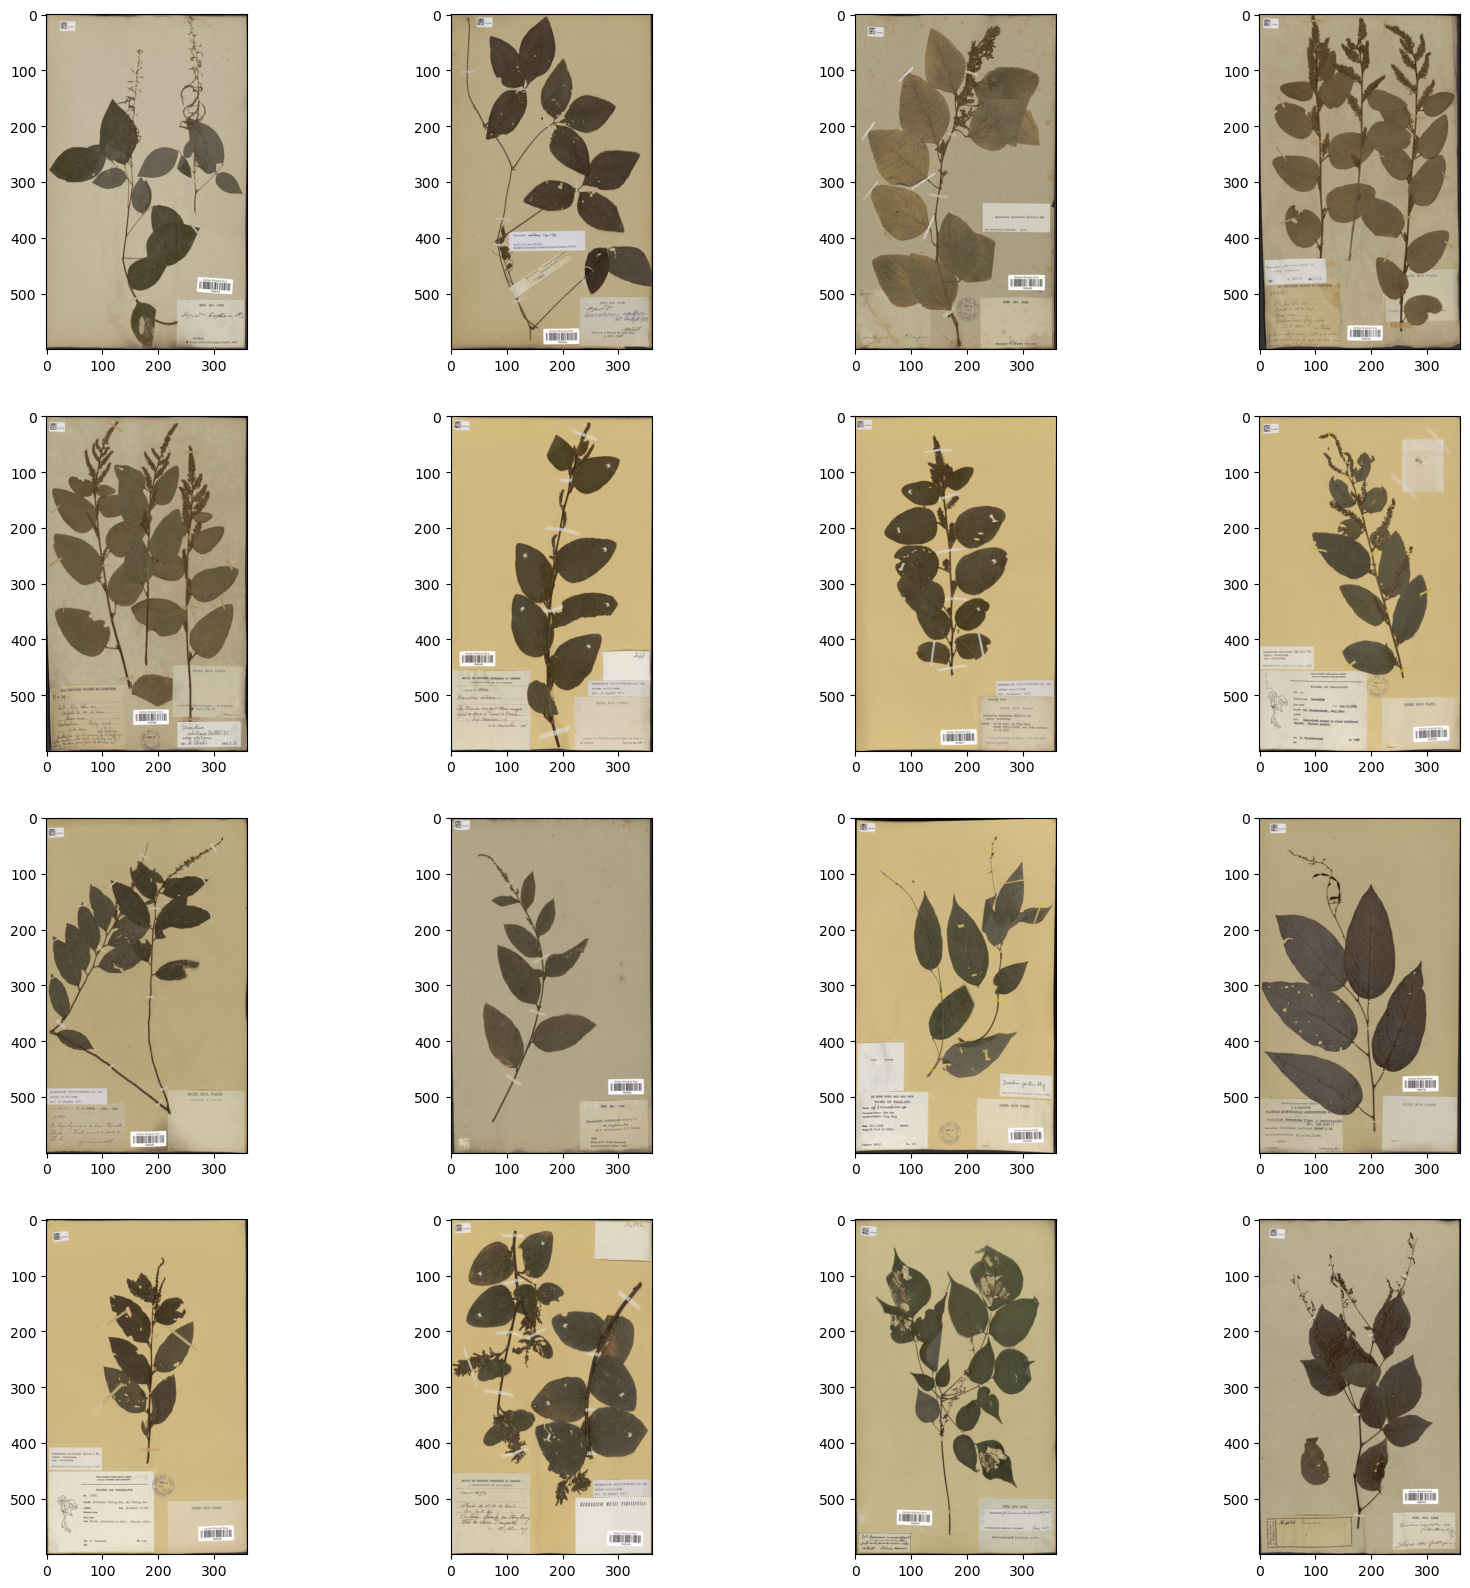

In [93]:
fig,axes = plt.subplots(4,4,figsize=(20, 20))

j = 0
for i,img in enumerate(x_train[:16]):
    axes[i//4,j%4].imshow(img)
    j+=1

In [97]:
# Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[600, 360, 3]),  # input layer
    keras.layers.Dense(100, activation='relu'),  # hidden layer
    keras.layers.Dense(2, activation='softmax')  # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [98]:
# Train model
model.fit(x_train, y_train, epochs=20)

Epoch 1/20


2022-11-30 22:04:17.921455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 4s 366ms/step - loss: 69.4904 - accuracy: 0.8342
Epoch 2/20
7/7 [==============================] - 2s 336ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 3s 440ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 3s 371ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 3s 367ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 2s 338ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 2s 325ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 2s 311ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 2s 336ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 3s 351ms/step - loss: 0.0000e+00 - accuracy: 

In [99]:
# train_path = "./resource/Train/"
test_path = "./resource/Test/"
# test_path = "./resource/Test2/"
nub_test = len(glob(test_path + '/*/*.jpg'))
#先生成空array，然后往里填每张图片的array
x_test = np.zeros((nub_test, 600, 360, 3), dtype=np.uint8)
y_test = np.zeros((nub_test,), dtype=np.uint8)

j = 0
for img_path in tqdm(glob(train_path + '/*/*.jpg')):
    img = Image.open(img_path)
    img = img.resize((360, 600))  #图片resize
    arr = np.asarray(img)  #图片转array
    x_test[i, :, :, :] = arr  #赋值
    typeName = img_path.split('/')[-2]
    if typeName == 'amborella':
        y_test[i] = 0
    elif typeName == ' castanea':
        y_test[i] = 1
    elif typeName == ' convolvulaceae':
        y_test[i] = 2
    elif typeName == ' desmodium':
        y_test[i] = 3
    elif typeName == ' eugenia':
        y_test[i] = 4
    elif typeName == ' laurus':
        y_test[i] = 5
    elif typeName == ' litsea':
        y_test[i] = 6
    elif typeName == ' magnolia':
        y_test[i] = 7
    elif typeName == ' monimiaceae':
        y_test[i] = 8
    elif typeName == ' rubus':
        y_test[i] = 9
    elif typeName == ' ulmus':
        y_test[i] = 10
    j += 1

100%|██████████| 193/193 [01:04<00:00,  2.98it/s]


In [100]:
# Evaluate model
valid_loss, valid_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Valid loss:{valid_loss}")
print(f"Valid accuracy:{valid_acc}")

2022-11-30 22:06:12.545333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 214ms/step - loss: 0.6621 - accuracy: 1.0000
Valid loss:0.6620995998382568
Valid accuracy:1.0


In [106]:
# 模型保存，注意：仅仅是多了一个save_format的参数而已
# 注意：这里的'path_to_saved_model'不再是模型名称，仅仅是一个文件夹，模型会保存在这个文件夹之下
model.save('saved_model', save_format='tf')

INFO:tensorflow:Assets written to: saved_model/assets


In [ ]:
# 加载模型，通过指定存放模型的文件夹来加载
new_model = keras.models.load_model('aved_model')

In [107]:
# 看到模型的结构
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 648000)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               64800100  
                                                                 
 dense_15 (Dense)            (None, 2)                 202       
                                                                 
Total params: 64,800,302
Trainable params: 64,800,302
Non-trainable params: 0
_________________________________________________________________
